In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df1 = pd.read_csv('twitter_llm_depressive_clean_full.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123984 entries, 0 to 123983
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sequence        123984 non-null  object 
 1   labels          123984 non-null  object 
 2   scores          123984 non-null  object 
 3   depression      123984 non-null  float64
 4   not_depression  123984 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.7+ MB


In [ ]:
df1.head(10)

,sequence,labels,scores,depression,not_depression
0,rising cases covid alarm rising death rate tes...,"['Depressive', 'Not Depressive']","[0.5077887177467346, 0.4922112226486206]",0.507789,0.492211
1,please vote chicagoindiaresolution marking ind...,"['Depressive', 'Not Depressive']","[0.5408154129981995, 0.45918455719947815]",0.540815,0.459185
2,wishing eidaladha hazrat ibrahim ki sunnah aap...,"['Depressive', 'Not Depressive']","[0.4123838245868683, 0.5876162052154541]",0.412384,0.587616
3,daily coronavirus cases india top first time c...,"['Depressive', 'Not Depressive']","[0.6547812223434448, 0.3452187776565552]",0.654781,0.345219
4,sitting india style watching raindrops hit big...,"['Depressive', 'Not Depressive']","[0.4334720969200134, 0.5665279030799866]",0.433472,0.566528
5,believes china india natural resources availab...,"['Depressive', 'Not Depressive']","[0.4633953869342804, 0.536604642868042]",0.463395,0.536605
6,happy new education policy implementation indi...,"['Depressive', 'Not Depressive']","[0.08930658549070358, 0.9106934070587158]",0.089307,0.910693
7,india development partnership come conditions pm,"['Depressive', 'Not Depressive']","[0.4394679367542267, 0.5605320334434509]",0.439468,0.560532
8,hon prime minister india new education policy ...,"['Depressive', 'Not Depressive']","[0.33402568101882935, 0.6659743189811707]",0.334026,0.665974
9,look forward implementation new education poli...,"['Depressive', 'Not Depressive']","[0.26553067564964294, 0.7344693541526794]",0.265531,0.734469


In [ ]:
df1.tail(10)

,sequence,labels,scores,depression,not_depression
123974,personal liberty granted,"['Depressive', 'Not Depressive']","[0.13236738741397858, 0.8676326274871826]",0.132367,0.867633
123975,unprecedented step,"['Depressive', 'Not Depressive']","[0.4022051692008972, 0.5977948307991028]",0.402205,0.597795
123976,shahmahmoodqureshi said reports india backing ...,"['Depressive', 'Not Depressive']","[0.3730955123901367, 0.6269045472145081]",0.373096,0.626905
123977,military spokesman claimed evidence indian int...,"['Depressive', 'Not Depressive']","[0.45666879415512085, 0.5433312654495239]",0.456669,0.543331
123978,india mind heart,"['Depressive', 'Not Depressive']","[0.22048276662826538, 0.7795172333717346]",0.220483,0.779517
123979,unification ttp breakaway factions jua hua aug...,"['Depressive', 'Not Depressive']","[0.5358836054801941, 0.46411633491516113]",0.535884,0.464116
123980,happydiwali india dgisi dgispr real face expos...,"['Depressive', 'Not Depressive']","[0.2425169050693512, 0.7574830651283264]",0.242517,0.757483
123981,anybody know website ships pre order bts seaso...,"['Depressive', 'Not Depressive']","[0.4134303629398346, 0.5865696668624878]",0.413430,0.586570
123982,hinted weeks back interview today presented ev...,"['Depressive', 'Not Depressive']","[0.416995644569397, 0.583004355430603]",0.416996,0.583004
123983,slice pakistan national security advisor world...,"['Depressive', 'Not Depressive']","[0.6430292725563049, 0.35697078704833984]",0.643029,0.356971


In [ ]:
df1.depression

,depression
0,0.507789
1,0.540815
2,0.412384
3,0.654781
4,0.433472
...,...
123979,0.535884
123980,0.242517
123981,0.413430
123982,0.416996


In [ ]:
df = df1.drop(columns=['labels', 'scores'])

In [ ]:
df.head(10)

,sequence,depression,not_depression
0,rising cases covid alarm rising death rate tes...,0.507789,0.492211
1,please vote chicagoindiaresolution marking ind...,0.540815,0.459185
2,wishing eidaladha hazrat ibrahim ki sunnah aap...,0.412384,0.587616
3,daily coronavirus cases india top first time c...,0.654781,0.345219
4,sitting india style watching raindrops hit big...,0.433472,0.566528
5,believes china india natural resources availab...,0.463395,0.536605
6,happy new education policy implementation indi...,0.089307,0.910693
7,india development partnership come conditions pm,0.439468,0.560532
8,hon prime minister india new education policy ...,0.334026,0.665974
9,look forward implementation new education poli...,0.265531,0.734469


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123984 entries, 0 to 123983
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sequence        123984 non-null  object 
 1   depression      123984 non-null  float64
 2   not_depression  123984 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.8+ MB


In [ ]:
df = df.rename(columns= {'sequence': 'text'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123984 entries, 0 to 123983
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text            123984 non-null  object 
 1   depression      123984 non-null  float64
 2   not_depression  123984 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.8+ MB


In [ ]:
data_numeric = df[['not_depression', 'depression']]

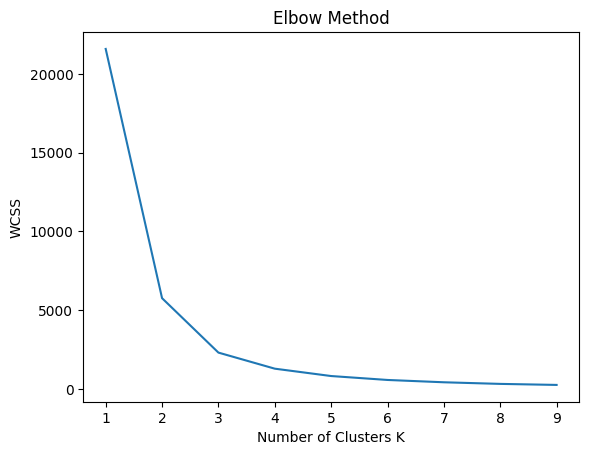

In [ ]:
wcss = []
max_index = 10

for i in range(1, max_index):
  kmeans = KMeans(n_clusters = i, max_iter = 300)
  kmeans.fit(data_numeric)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, max_index), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters K")
plt.ylabel("WCSS")
plt.show()

In [ ]:
wcss_score = []
sil_scores = []
min_index = 2
max_index = 10
index = range(min_index, max_index)
for i in index:
    kmeans = KMeans(n_clusters=i, max_iter = 300, algorithm="elkan")
    labels = kmeans.fit_predict(data_numeric)
    wcss_score.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(data_numeric, labels))

    print('K =', i,)
    print("Elbow Method: %0.3f" % kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % sil_scores[i - min_index])
    print("---------------------------------------------------------------")

K = 2
Elbow Method: 5753.373
Silhouette Coefficient: 0.613
---------------------------------------------------------------
K = 3
Elbow Method: 2297.714
Silhouette Coefficient: 0.606
---------------------------------------------------------------
K = 4
Elbow Method: 1276.661
Silhouette Coefficient: 0.588
---------------------------------------------------------------
K = 5
Elbow Method: 809.792
Silhouette Coefficient: 0.578
---------------------------------------------------------------
K = 6
Elbow Method: 561.297
Silhouette Coefficient: 0.568
---------------------------------------------------------------
K = 7
Elbow Method: 413.752
Silhouette Coefficient: 0.565
---------------------------------------------------------------
K = 8
Elbow Method: 313.062
Silhouette Coefficient: 0.560
---------------------------------------------------------------
K = 9
Elbow Method: 245.172
Silhouette Coefficient: 0.555
---------------------------------------------------------------


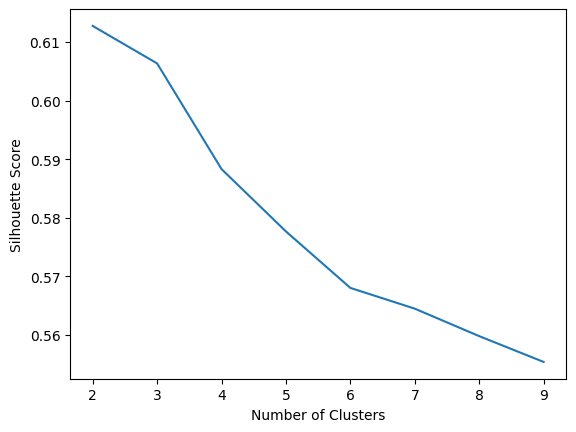

In [ ]:
plt.plot(range(2, 10), sil_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(data_numeric)

labels = Kmean.labels_

In [ ]:
df['cluster'] = labels

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123984 entries, 0 to 123983
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text            123984 non-null  object 
 1   depression      123984 non-null  float64
 2   not_depression  123984 non-null  float64
 3   cluster         123984 non-null  int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 3.3+ MB


In [ ]:
df.head(10)

,text,depression,not_depression,cluster
0,rising cases covid alarm rising death rate tes...,0.507789,0.492211,0
1,please vote chicagoindiaresolution marking ind...,0.540815,0.459185,1
2,wishing eidaladha hazrat ibrahim ki sunnah aap...,0.412384,0.587616,0
3,daily coronavirus cases india top first time c...,0.654781,0.345219,1
4,sitting india style watching raindrops hit big...,0.433472,0.566528,0
5,believes china india natural resources availab...,0.463395,0.536605,0
6,happy new education policy implementation indi...,0.089307,0.910693,0
7,india development partnership come conditions pm,0.439468,0.560532,0
8,hon prime minister india new education policy ...,0.334026,0.665974,0
9,look forward implementation new education poli...,0.265531,0.734469,0


In [ ]:
df.groupby('cluster').count()

,text,depression,not_depression
cluster,,,
0,70509,70509,70509
1,53475,53475,53475


In [ ]:
filtered_label_0 = df[labels == 0]
filtered_label_0.describe()

,depression,not_depression,cluster
count,70509.000000,70509.000000,70509.0
mean,0.272251,0.727749,0.0
std,0.155937,0.155937,0.0
min,0.002445,0.472079,0.0
25%,0.135054,0.591054,0.0
50%,0.284341,0.715659,0.0
75%,0.408946,0.864946,0.0
max,0.527921,0.997555,0.0


In [ ]:
filtered_label_1 = df[labels == 1]
filtered_label_1.describe()

,depression,not_depression,cluster
count,53475.000000,53475.000000,53475.0
mean,0.782365,0.217635,1.0
std,0.147425,0.147425,0.0
min,0.527931,0.002277,1.0
25%,0.645909,0.079752,1.0
50%,0.797496,0.202504,1.0
75%,0.920248,0.354091,1.0
max,0.997723,0.472069,1.0


In [ ]:
df.to_csv("labeled_twitter_depressive_full_clean_km2.csv", index=False)

In [ ]:
data = pd.read_csv('labeled_twitter_depressive_full_clean_km2.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123984 entries, 0 to 123983
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text            123984 non-null  object 
 1   depression      123984 non-null  float64
 2   not_depression  123984 non-null  float64
 3   cluster         123984 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.8+ MB


In [ ]:
data.head(10)

,text,depression,not_depression,cluster
0,rising cases covid alarm rising death rate tes...,0.507789,0.492211,0
1,please vote chicagoindiaresolution marking ind...,0.540815,0.459185,1
2,wishing eidaladha hazrat ibrahim ki sunnah aap...,0.412384,0.587616,0
3,daily coronavirus cases india top first time c...,0.654781,0.345219,1
4,sitting india style watching raindrops hit big...,0.433472,0.566528,0
5,believes china india natural resources availab...,0.463395,0.536605,0
6,happy new education policy implementation indi...,0.089307,0.910693,0
7,india development partnership come conditions pm,0.439468,0.560532,0
8,hon prime minister india new education policy ...,0.334026,0.665974,0
9,look forward implementation new education poli...,0.265531,0.734469,0


In [ ]:
data.groupby('cluster').count()

,text,depression,not_depression
cluster,,,
0,70509,70509,70509
1,53475,53475,53475
